In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential 
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]

In [3]:
train_path = '/Users/kunal/Desktop/ML projects/Face-Recognition/dataset/train/'
valid_path = '/Users/kunal/Desktop/ML projects/Face-Recognition/dataset/valid'

In [4]:
vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)

In [5]:
for layers in vgg.layers:
    layers.trainable = False

In [6]:
folders = glob('/Users/kunal/Desktop/ML projects/Face-Recognition/dataset/train/*')

In [7]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation = 'softmax')(x)

In [8]:
model = Model(inputs = vgg.input, outputs = prediction)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [11]:
model.compile(
loss = 'categorical_crossentropy',
optimizer = 'adam',
metrics = 'accuracy'
)

In [19]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range= 0.2, zoom_range = 0.2, horizontal_flip = True)

In [20]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [28]:
training_set = train_datagen.flow_from_directory(train_path, target_size=(224,224), batch_size=8, class_mode='categorical')

Found 8 images belonging to 1 classes.


In [23]:
test_set = test_datagen.flow_from_directory(valid_path, target_size=(224,224), batch_size=8, class_mode='categorical')

Found 0 images belonging to 0 classes.


In [29]:
r = model.fit_generator(
    training_set, 
    validation_data=test_set, 
    epochs=20, 
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set))

/Users/kunal/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 2/20
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/20
1/1 [==============================] - 1s 982ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/20
1/1 [==============================] - 1s 975ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 1s 972ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 1s 974ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 1s 970ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/20
1/1 [==============================] - 1s 974ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/20
1/1 [==============================] - 1s 970ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/20
1/1 [==============================] - 1s 970ms/step - loss: 0.0000e+00 - ac

KeyError: 'vval_loss'

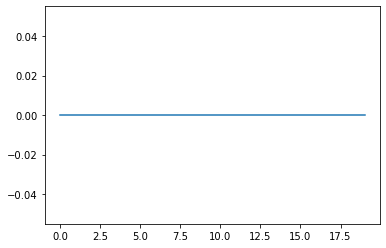

In [31]:
plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['vval_loss'], label = 'vval loss')
ply.legend()
plt.show()

In [33]:
plt.plot(r.history['acc'], label = 'train acc')
plt.plot(r.history['vval_acc'], label = 'vval acc')
ply.legend()
plt.show()

KeyError: 'acc'

In [34]:
model.save('face.model')

INFO:tensorflow:Assets written to: face.model/assets
